In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [2]:
flights = pd.read_csv("flights.csv")
flights.drop(columns="Unnamed: 0" ,inplace= True)
print(flights.isna().sum())
flights.dropna(inplace= True)

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64


In [3]:
# binary indicator for delay
flights["delayed_ind"] = np.where(np.array(flights["arr_delay"] > 0) & (flights["dep_delay"] >0),1,0)
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,delayed_ind
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,0
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,0
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,0
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,1


# delay percentage by destination

In [4]:
flights_by_dest = pd.DataFrame(flights.groupby("dest").size().reset_index())
flights_by_dest.columns = ["dest", "total_flights_dest"]
delayed = flights[flights["delayed_ind"] == 1]
delayed_by_dest = pd.DataFrame(delayed.groupby("dest").size().reset_index())
delayed_by_dest.columns = ["dest", "total_delays_dest"]
delay_perc = delayed_by_dest.merge(flights_by_dest, on = "dest", how = "inner")
delay_perc.head()

,dest,total_delays_dest,total_flights_dest
0,ABQ,77,254
1,ACK,71,264
2,ALB,169,418
3,ANC,4,8
4,ATL,4799,16837


In [5]:
delay_perc["delay_perc_dest"] = round(delay_perc["total_delays_dest"]/delay_perc["total_flights_dest"],3)
delay_perc.head()

,dest,total_delays_dest,total_flights_dest,delay_perc_dest
0,ABQ,77,254,0.303
1,ACK,71,264,0.269
2,ALB,169,418,0.404
3,ANC,4,8,0.500
4,ATL,4799,16837,0.285


In [6]:
flights = flights.merge(delay_perc, on = "dest", how ="left")
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,delayed_ind,total_delays_dest,total_flights_dest,delay_perc_dest
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,2022.0,7085.0,0.285
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,2022.0,7085.0,0.285
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,2566.0,11593.0,0.221
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0,280.0,888.0,0.315
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0,4799.0,16837.0,0.285


# delay percentage by carrier

In [7]:
flights_by_carr = pd.DataFrame(flights.groupby("carrier").size().reset_index())
flights_by_carr.columns = ["carrier", "total_flights_carr"]
delayed = flights[flights["delayed_ind"] == 1]
delayed_by_carr = pd.DataFrame(delayed.groupby("carrier").size().reset_index())
delayed_by_carr.columns = ["carrier", "total_delays_carr"]
delay_perc = delayed_by_carr.merge(flights_by_carr, on = "carrier", how = "inner")
delay_perc["delay_perc_carr"] = round(delay_perc["total_delays_carr"]/delay_perc["total_flights_carr"],3)
delay_perc.head()

,carrier,total_delays_carr,total_flights_carr,delay_perc_carr
0,9E,5055,17294,0.292
1,AA,6668,31947,0.209
2,AS,125,709,0.176
3,B6,16436,54049,0.304
4,DL,10126,47658,0.212


In [8]:
flights = flights.merge(delay_perc, on = "carrier", how ="left")
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,delayed_ind,total_delays_dest,total_flights_dest,delay_perc_dest,total_delays_carr,total_flights_carr,delay_perc_carr
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,2022.0,7085.0,0.285,16606,57782,0.287
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,2022.0,7085.0,0.285,16606,57782,0.287
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,2566.0,11593.0,0.221,6668,31947,0.209
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0,280.0,888.0,0.315,16436,54049,0.304
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0,4799.0,16837.0,0.285,10126,47658,0.212


In [9]:
flights.dropna(inplace=True)

# create date, dep_hour, arr_hour, and sched_arr_hour

In [10]:
# date
flights["date"] = flights["year"].astype(str)+ "-"+flights["month"].astype(str)+"-"+flights["day"].astype(str)
flights["date"]=pd.to_datetime(flights["date"])
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,delayed_ind,total_delays_dest,total_flights_dest,delay_perc_dest,total_delays_carr,total_flights_carr,delay_perc_carr,date
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,2022.0,7085.0,0.285,16606,57782,0.287,2013-01-01
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,2022.0,7085.0,0.285,16606,57782,0.287,2013-01-01
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,2566.0,11593.0,0.221,6668,31947,0.209,2013-01-01
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0,280.0,888.0,0.315,16436,54049,0.304,2013-01-01
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0,4799.0,16837.0,0.285,10126,47658,0.212,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,0,549.0,1707.0,0.322,16436,54049,0.304,2013-09-30
327342,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,0,1349.0,4570.0,0.295,16436,54049,0.304,2013-09-30
327343,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,0,743.0,2358.0,0.315,16436,54049,0.304,2013-09-30
327344,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,1,3460.0,15022.0,0.230,16436,54049,0.304,2013-09-30


In [11]:
# hours
flights["dep_hour"] = flights["dep_time"] // 100
flights["arr_hour"] = flights["arr_time"] // 100
flights["sched_arr_hour"] = flights["sched_arr_time"]//100
flights = flights.rename(columns={"hour": "sched_dep_hour"})
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,sched_dep_hour,minute,time_hour,delayed_ind,total_delays_dest,total_flights_dest,delay_perc_dest,total_delays_carr,total_flights_carr,delay_perc_carr,date,dep_hour,arr_hour,sched_arr_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,2022.0,7085.0,0.285,16606,57782,0.287,2013-01-01,5.0,8.0,8
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,2022.0,7085.0,0.285,16606,57782,0.287,2013-01-01,5.0,8.0,8
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,2566.0,11593.0,0.221,6668,31947,0.209,2013-01-01,5.0,9.0,8
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0,280.0,888.0,0.315,16436,54049,0.304,2013-01-01,5.0,10.0,10
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0,4799.0,16837.0,0.285,10126,47658,0.212,2013-01-01,5.0,8.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,0,549.0,1707.0,0.322,16436,54049,0.304,2013-09-30,22.0,23.0,23
327342,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,0,1349.0,4570.0,0.295,16436,54049,0.304,2013-09-30,22.0,23.0,0
327343,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,0,743.0,2358.0,0.315,16436,54049,0.304,2013-09-30,22.0,23.0,0
327344,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,1,3460.0,15022.0,0.230,16436,54049,0.304,2013-09-30,23.0,23.0,23


# join tables

In [12]:
planes = pd.read_csv("planes.csv")
planes.drop(columns="Unnamed: 0" ,inplace= True)
airports = pd.read_csv("airports.csv")
airports.drop(columns="Unnamed: 0" ,inplace= True)

In [13]:
meta_data = flights.merge(airports, how = "left", left_on = "dest", right_on = "faa" )
meta_data = meta_data.merge(planes, how = "left", left_on = "tailnum", right_on= "tailnum")
meta_data.head()

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,sched_dep_hour,minute,time_hour,delayed_ind,total_delays_dest,total_flights_dest,delay_perc_dest,total_delays_carr,total_flights_carr,delay_perc_carr,date,dep_hour,arr_hour,sched_arr_hour,faa,name,lat,lon,alt,tz,dst,tzone,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,2022.0,7085.0,0.285,16606,57782,0.287,2013-01-01,5.0,8.0,8,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,2022.0,7085.0,0.285,16606,57782,0.287,2013-01-01,5.0,8.0,8,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,2566.0,11593.0,0.221,6668,31947,0.209,2013-01-01,5.0,9.0,8,MIA,Miami Intl,25.793250,-80.290556,8.0,-5.0,A,America/New_York,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0,280.0,888.0,0.315,16436,54049,0.304,2013-01-01,5.0,10.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0,4799.0,16837.0,0.285,10126,47658,0.212,2013-01-01,5.0,8.0,8,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan


In [14]:
# plane_age
meta_data["plane_age"] = meta_data["year_x"] - meta_data["year_y"]
meta_data

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,sched_dep_hour,minute,time_hour,delayed_ind,total_delays_dest,total_flights_dest,delay_perc_dest,total_delays_carr,total_flights_carr,delay_perc_carr,date,dep_hour,arr_hour,sched_arr_hour,faa,name,lat,lon,alt,tz,dst,tzone,year_y,type,manufacturer,model,engines,seats,speed,engine,plane_age
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,2022.0,7085.0,0.285,16606,57782,0.287,2013-01-01,5.0,8.0,8,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan,14.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,2022.0,7085.0,0.285,16606,57782,0.287,2013-01-01,5.0,8.0,8,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan,15.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,2566.0,11593.0,0.221,6668,31947,0.209,2013-01-01,5.0,9.0,8,MIA,Miami Intl,25.793250,-80.290556,8.0,-5.0,A,America/New_York,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan,23.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0,280.0,888.0,0.315,16436,54049,0.304,2013-01-01,5.0,10.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan,1.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0,4799.0,16837.0,0.285,10126,47658,0.212,2013-01-01,5.0,8.0,8,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327340,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,0,549.0,1707.0,0.322,16436,54049,0.304,2013-09-30,22.0,23.0,23,SYR,Syracuse Hancock Intl,43.111187,-76.106311,421.0,-5.0,A,America/New_York,2013.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2.0,20.0,NaN,Turbo-fan,0.0
327341,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,0,1349.0,4570.0,0.295,16436,54049,0.304,2013-09-30,22.0,23.0,0,BUF,Buffalo Niagara Intl,42.940525,-78.732167,724.0,-5.0,A,America/New_York,2007.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2.0,20.0,NaN,Turbo-fan,6.0
327342,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,0,743.0,2358.0,0.315,16436,54049,0.304,2013-09-30,22.0,23.0,0,ROC,Greater Rochester Intl,43.118866,-77.672389,559.0,-5.0,A,America/New_York,2011.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2.0,20.0,NaN,Turbo-fan,2.0
327343,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,1,3460.0,15022.0,0.230,16436,54049,0.304,2013-09-30,23.0,23.0,23,BOS,General Edward Lawrence Logan Intl,42.364347,-71.005181,19.0,-5.0,A,America/New_York,2003.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan,10.0


In [15]:
# change flight
meta_data["flight"]=meta_data["carrier"].astype("str")+meta_data["flight"].astype("str")
meta_data

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,sched_dep_hour,minute,time_hour,delayed_ind,total_delays_dest,total_flights_dest,delay_perc_dest,total_delays_carr,total_flights_carr,delay_perc_carr,date,dep_hour,arr_hour,sched_arr_hour,faa,name,lat,lon,alt,tz,dst,tzone,year_y,type,manufacturer,model,engines,seats,speed,engine,plane_age
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,UA1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,2022.0,7085.0,0.285,16606,57782,0.287,2013-01-01,5.0,8.0,8,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan,14.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,UA1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,2022.0,7085.0,0.285,16606,57782,0.287,2013-01-01,5.0,8.0,8,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan,15.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,AA1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,2566.0,11593.0,0.221,6668,31947,0.209,2013-01-01,5.0,9.0,8,MIA,Miami Intl,25.793250,-80.290556,8.0,-5.0,A,America/New_York,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan,23.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,B6725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0,280.0,888.0,0.315,16436,54049,0.304,2013-01-01,5.0,10.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan,1.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,DL461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0,4799.0,16837.0,0.285,10126,47658,0.212,2013-01-01,5.0,8.0,8,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327340,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,B61816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,0,549.0,1707.0,0.322,16436,54049,0.304,2013-09-30,22.0,23.0,23,SYR,Syracuse Hancock Intl,43.111187,-76.106311,421.0,-5.0,A,America/New_York,2013.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2.0,20.0,NaN,Turbo-fan,0.0
327341,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,B62002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,0,1349.0,4570.0,0.295,16436,54049,0.304,2013-09-30,22.0,23.0,0,BUF,Buffalo Niagara Intl,42.940525,-78.732167,724.0,-5.0,A,America/New_York,2007.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2.0,20.0,NaN,Turbo-fan,6.0
327342,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,B6486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,0,743.0,2358.0,0.315,16436,54049,0.304,2013-09-30,22.0,23.0,0,ROC,Greater Rochester Intl,43.118866,-77.672389,559.0,-5.0,A,America/New_York,2011.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2.0,20.0,NaN,Turbo-fan,2.0
327343,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,B6718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,1,3460.0,15022.0,0.230,16436,54049,0.304,2013-09-30,23.0,23.0,23,BOS,General Edward Lawrence Logan Intl,42.364347,-71.005181,19.0,-5.0,A,America/New_York,2003.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan,10.0


# Drop unnecessary columns 

In [16]:
meta_data.columns

Index(['year_x', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'sched_dep_hour',
       'minute', 'time_hour', 'delayed_ind', 'total_delays_dest',
       'total_flights_dest', 'delay_perc_dest', 'total_delays_carr',
       'total_flights_carr', 'delay_perc_carr', 'date', 'dep_hour', 'arr_hour',
       'sched_arr_hour', 'faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst',
       'tzone', 'year_y', 'type', 'manufacturer', 'model', 'engines', 'seats',
       'speed', 'engine', 'plane_age'],
      dtype='object')

In [17]:
drop_col = ['day','dep_time', 'sched_dep_time','arr_time', 'sched_arr_time','minute','time_hour',
            'faa','dst','year_y',"speed"]
meta_data.drop(drop_col, axis = 1, inplace= True)
meta_data.head()

,year_x,month,dep_delay,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,sched_dep_hour,delayed_ind,total_delays_dest,total_flights_dest,delay_perc_dest,total_delays_carr,total_flights_carr,delay_perc_carr,date,dep_hour,arr_hour,sched_arr_hour,name,lat,lon,alt,tz,tzone,type,manufacturer,model,engines,seats,engine,plane_age
0,2013,1,2.0,11.0,UA,UA1545,N14228,EWR,IAH,227.0,1400,5,1,2022.0,7085.0,0.285,16606,57782,0.287,2013-01-01,5.0,8.0,8,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,America/Chicago,Fixed wing multi engine,BOEING,737-824,2.0,149.0,Turbo-fan,14.0
1,2013,1,4.0,20.0,UA,UA1714,N24211,LGA,IAH,227.0,1416,5,1,2022.0,7085.0,0.285,16606,57782,0.287,2013-01-01,5.0,8.0,8,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,America/Chicago,Fixed wing multi engine,BOEING,737-824,2.0,149.0,Turbo-fan,15.0
2,2013,1,2.0,33.0,AA,AA1141,N619AA,JFK,MIA,160.0,1089,5,1,2566.0,11593.0,0.221,6668,31947,0.209,2013-01-01,5.0,9.0,8,Miami Intl,25.793250,-80.290556,8.0,-5.0,America/New_York,Fixed wing multi engine,BOEING,757-223,2.0,178.0,Turbo-fan,23.0
3,2013,1,-1.0,-18.0,B6,B6725,N804JB,JFK,BQN,183.0,1576,5,0,280.0,888.0,0.315,16436,54049,0.304,2013-01-01,5.0,10.0,10,NaN,NaN,NaN,NaN,NaN,NaN,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,Turbo-fan,1.0
4,2013,1,-6.0,-25.0,DL,DL461,N668DN,LGA,ATL,116.0,762,6,0,4799.0,16837.0,0.285,10126,47658,0.212,2013-01-01,5.0,8.0,8,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,America/New_York,Fixed wing multi engine,BOEING,757-232,2.0,178.0,Turbo-fan,22.0


# Drop NA

In [18]:
print(meta_data.isna().sum())
meta_data.dropna(inplace= True)

year_x                    0
month                     0
dep_delay                 0
arr_delay                 0
carrier                   0
flight                    0
tailnum                   0
origin                    0
dest                      0
air_time                  0
distance                  0
sched_dep_hour            0
delayed_ind               0
total_delays_dest         0
total_flights_dest        0
delay_perc_dest           0
total_delays_carr         0
total_flights_carr        0
delay_perc_carr           0
date                      0
dep_hour                  0
arr_hour                  0
sched_arr_hour            0
name                   7537
lat                    7537
lon                    7537
alt                    7537
tz                     7537
tzone                  7537
type                  48329
manufacturer          48329
model                 48329
engines               48329
seats                 48329
engine                48329
plane_age           

In [19]:
meta_data.shape

(267788, 36)

In [21]:
meta_data.to_csv("meta_data.csv")

# EDA Plots

In [20]:
meta_data.describe()

,year_x,month,dep_delay,arr_delay,air_time,distance,sched_dep_hour,delayed_ind,total_delays_dest,total_flights_dest,delay_perc_dest,total_delays_carr,total_flights_carr,delay_perc_carr,dep_hour,arr_hour,sched_arr_hour,lat,lon,alt,tz,engines,seats,plane_age
count,267788.0,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000,267788.000000
mean,2013.0,6.585161,13.151232,7.103141,153.216600,1065.406295,13.153890,0.288023,2308.710924,8561.095493,0.285398,12763.960133,43714.221425,0.287773,13.206073,14.758533,15.110087,36.008240,-90.172714,592.197022,-5.803849,1.995452,136.959983,11.647277
std,0.0,3.406773,40.613356,45.136391,98.056903,768.460508,4.654984,0.452843,1376.879440,5422.746443,0.046819,5807.465260,16426.510580,0.062738,4.894336,5.359800,4.972024,5.764046,15.689578,997.881900,1.128976,0.084729,71.767827,6.421925
min,2013.0,1.000000,-43.000000,-86.000000,20.000000,80.000000,5.000000,0.000000,1.000000,8.000000,0.056000,8.000000,29.000000,0.108000,0.000000,0.000000,0.000000,21.318681,-157.922428,3.000000,-10.000000,1.000000,2.000000,0.000000
25%,2013.0,4.000000,-5.000000,-17.000000,82.000000,529.000000,9.000000,0.000000,1000.000000,3715.000000,0.251000,6668.000000,31947.000000,0.212000,9.000000,11.000000,11.000000,32.733556,-95.341442,26.000000,-6.000000,2.000000,55.000000,7.000000
50%,2013.0,7.000000,-1.000000,-5.000000,129.000000,937.000000,13.000000,0.000000,2077.000000,7390.000000,0.279000,16436.000000,51108.000000,0.287000,14.000000,15.000000,15.000000,36.080056,-84.219375,313.000000,-5.000000,2.000000,149.000000,11.000000
75%,2013.0,10.000000,11.000000,14.000000,195.000000,1400.000000,17.000000,1.000000,3460.000000,13674.000000,0.315000,16606.000000,54049.000000,0.304000,17.000000,19.000000,19.000000,41.411689,-80.152750,748.000000,-5.000000,2.000000,189.000000,14.000000
max,2013.0,12.000000,1301.000000,1272.000000,695.000000,4983.000000,23.000000,1.000000,4799.000000,16837.000000,0.670000,19183.000000,57782.000000,0.437000,24.000000,24.000000,23.000000,61.174361,-68.828139,6602.000000,-5.000000,4.000000,450.000000,57.000000


In [21]:
print("Carriers counts:",meta_data.carrier.nunique())
print("Origins:",meta_data.origin.unique())
print("Destinations counts:", meta_data.dest.nunique())
print("Airplanes counts:",meta_data.tailnum.nunique())
print("Manufacturer counts:", meta_data.manufacturer.nunique())
print("Model counts:",meta_data.model.nunique())
print("Engine counts:",meta_data.engine.nunique())
print("Date range:",min(meta_data.date),"to",max(meta_data.date))

Carriers counts: 16
Origins: ['EWR' 'LGA' 'JFK']
Destinations counts: 99
Airplanes counts: 3246
Manufacturer counts: 28
Model counts: 121
Engine counts: 6
Date range: 2013-01-01 00:00:00 to 2013-12-31 00:00:00


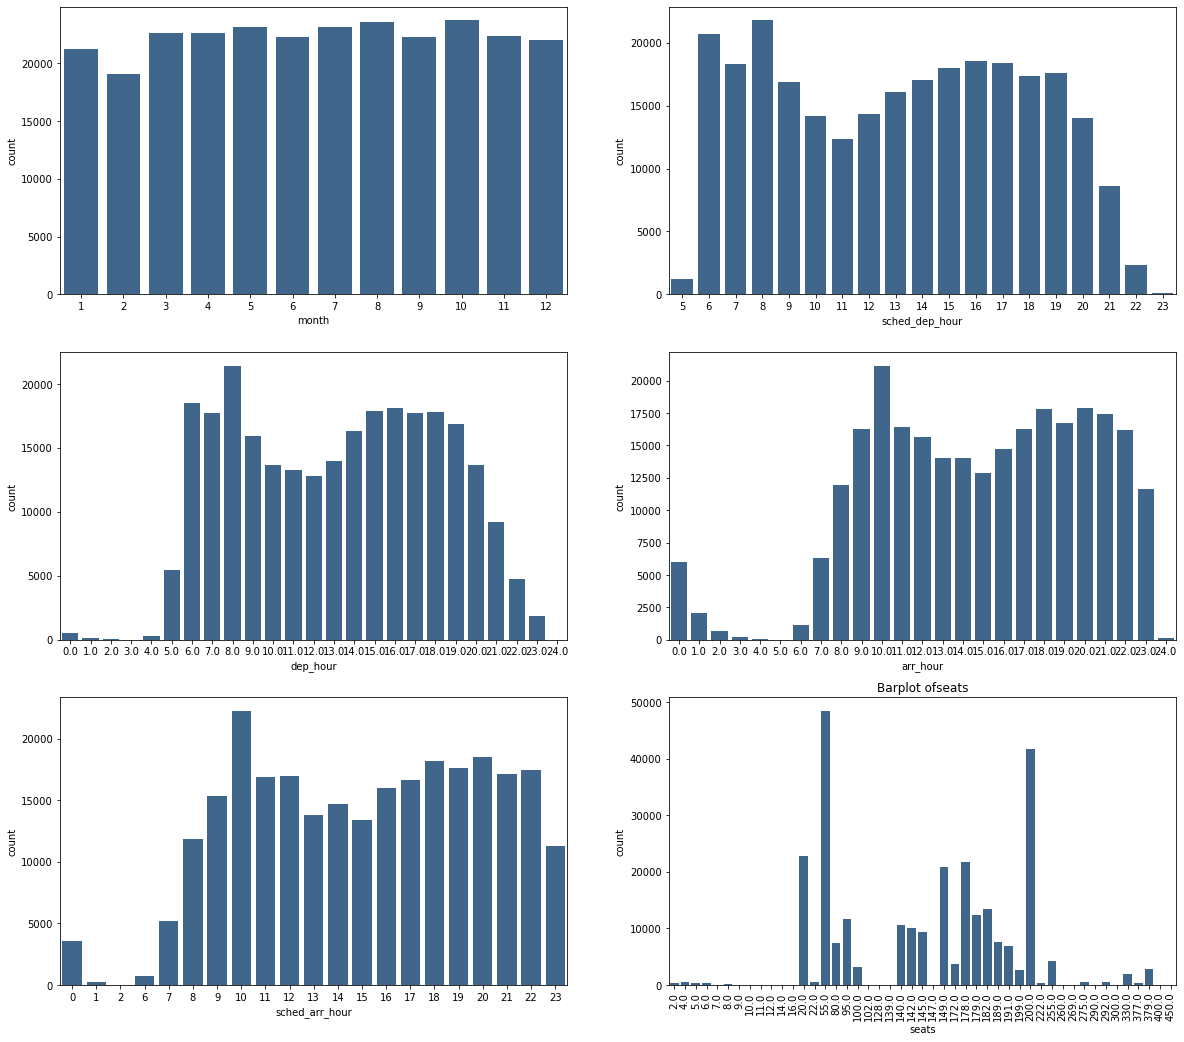

In [30]:
# Bar plots
bar_col=["month","sched_dep_hour","dep_hour","arr_hour","sched_arr_hour", "seats"]
fig,ax=plt.subplots(3,2, figsize=(20,18))
for i,ax in zip(bar_col,ax.ravel()):
    sns.countplot(data=meta_data, x=i, ax=ax, color=(0.2, 0.4, 0.6, 0.6))
    plt.title("Barplot of" +i)
plt.xticks(rotation=90)
plt.show()

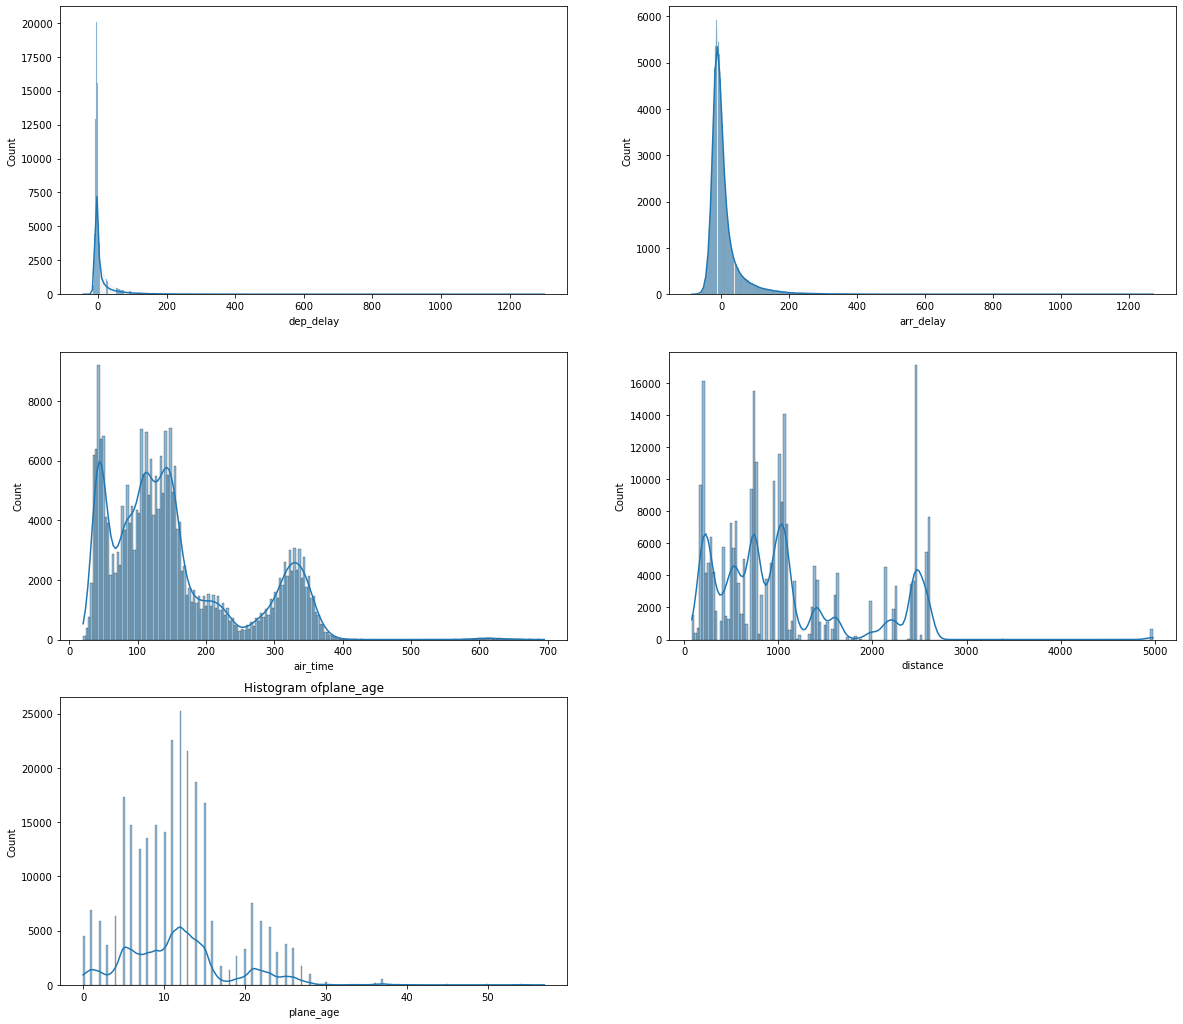

In [32]:
hist_col = ["dep_delay", "arr_delay", "air_time", "distance","plane_age"]
fig,ax=plt.subplots(3,2, figsize=(20,18))
fig.delaxes(ax[2,1])
for i,ax in zip(hist_col,ax.ravel()):
    sns.histplot(meta_data, x=i, kde=True, ax=ax)
    plt.title("Histogram of" +i)
plt.show()